## Import Libraries and dataset



In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pipeline as p
from geopandas import GeoDataFrame

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("C:/Users/Maca/Documents/project_ml/Project-Machine-Learning-CAPP/data_consolidation/consolidated_version2.csv")

In [2]:
df.head(2)

,Unnamed: 0,id,bot,description,probe_timestamp,created_at,lang,protected,verified,geo_enabled,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,source
0,0,3039154799,human,••TEEN WOLF//SKAM//SHAMELESS••Il mio livello d...,Thu May 16 13:57:12 +0000 2019,Sun Feb 15 14:56:36 +0000 2015,it,False,0.0,0.0,1.0,163,407,0,4193,5761,cresci-rtbust-2019
1,1,390617262,bot,NaN,Tue Apr 16 13:51:17 +0000 2019,Fri Oct 14 08:00:55 +0000 2011,it,False,0.0,0.0,1.0,289,401,1,213,3210,cresci-rtbust-2019


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'bot', 'description', 'probe_timestamp',
       'created_at', 'lang', 'protected', 'verified', 'geo_enabled',
       'default_profile', 'followers_count', 'friends_count', 'listed_count',
       'favourites_count', 'statuses_count', 'source'],
      dtype='object')

In [6]:
p.describe(df)

,Unnamed: 0,id,verified,geo_enabled,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count
count,63264.000000,6.326400e+04,55721.000000,56860.000000,56166.000000,6.326400e+04,6.326400e+04,63264.000000,63264.000000,6.326400e+04
mean,20393.214356,7.179809e+17,0.057267,0.155575,0.816704,5.140114e+04,1.220452e+03,160.520407,3030.690709,6.684949e+03
std,16265.554666,4.805380e+17,0.232355,0.362455,0.386912,1.389009e+06,1.995991e+04,3696.298209,15509.481248,3.938906e+04
min,0.000000,5.860000e+02,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3273.000000,2.369773e+09,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.100000e+01
50%,18905.500000,1.050035e+18,0.000000,0.000000,1.000000,2.000000e+00,3.600000e+01,0.000000,0.000000,4.500000e+01
75%,34721.250000,1.056234e+18,0.000000,0.000000,1.000000,1.000000e+02,2.672500e+02,1.000000,125.000000,3.182500e+02
max,50537.000000,1.079456e+18,1.000000,1.000000,1.000000,1.069380e+08,2.141379e+06,606500.000000,886115.000000,2.766520e+06


In [7]:
#Found the NaN values for each column
for i in df.columns:
    print("Found {} NaN {} records.".format(df[i].isna().sum(), i))

Found 0 NaN Unnamed: 0 records.
Found 0 NaN id records.
Found 7543 NaN bot records.
Found 32995 NaN description records.
Found 0 NaN probe_timestamp records.
Found 0 NaN created_at records.
Found 2987 NaN lang records.
Found 11086 NaN protected records.
Found 7543 NaN verified records.
Found 6404 NaN geo_enabled records.
Found 7098 NaN default_profile records.
Found 0 NaN followers_count records.
Found 0 NaN friends_count records.
Found 0 NaN listed_count records.
Found 0 NaN favourites_count records.
Found 0 NaN statuses_count records.
Found 0 NaN source records.


In [8]:
#Target value is column 'bot' I dropped all the NaN bot column
df = df.dropna(subset=['bot'])
for i in df.columns:
    print("Found {} NaN {} records.".format(df[i].isna().sum(), i))

Found 0 NaN Unnamed: 0 records.
Found 0 NaN id records.
Found 0 NaN bot records.
Found 28703 NaN description records.
Found 0 NaN probe_timestamp records.
Found 0 NaN created_at records.
Found 1987 NaN lang records.
Found 3543 NaN protected records.
Found 0 NaN verified records.
Found 0 NaN geo_enabled records.
Found 0 NaN default_profile records.
Found 0 NaN followers_count records.
Found 0 NaN friends_count records.
Found 0 NaN listed_count records.
Found 0 NaN favourites_count records.
Found 0 NaN statuses_count records.
Found 0 NaN source records.


In [9]:
#Fill NaN description, if no descrption is 0 otherwise 1
df['description'] = df.description.fillna(0)
df['has_description'] = df.loc[:, 'description'].apply(lambda x: 0 if x == 0 else 1)
df = df.drop(['description'], axis=1)

In [10]:
#if no lenguage is English then attribute is 0, 1 otherwise
df['len_en'] = df.loc[:, 'lang'].apply(lambda x: 1 if x == 'en' else 0)
df = df.drop(['lang'], axis=1)

In [12]:
#Transform bot column into dummy
df['bot'] = df.loc[:, 'bot'].apply(lambda x: 0 if x == 'human' else 1)

In [14]:
#Model only with to features that we need
df_to_model = df[['bot', 'verified', 'geo_enabled', 'default_profile', 'has_description', 'len_en', 'followers_count', 
                  'friends_count', 'listed_count', 'favourites_count', 'statuses_count']]

In [15]:
#Split
df_train, df_test = p.split(df_to_model)

Total data before split: 55721
Train size data: 44576
Test size data: 11145


In [16]:
df_train, df_test = p.replace_missing(df_train, df_test, ['followers_count', 
                  'friends_count', 'listed_count', 'favourites_count', 'statuses_count'])

"Train data before fillna with median value:"
 followers_count     0
friends_count       0
listed_count        0
favourites_count    0
statuses_count      0
dtype: int64
"Test data before fillna with median value:"
 followers_count     0
friends_count       0
listed_count        0
favourites_count    0
statuses_count      0
dtype: int64

"Median Values to fill" {'followers_count': 1.0, 'friends_count': 21.0, 'listed_count': 0.0, 'favourites_count': 0.0, 'statuses_count': 40.0} 

"Sanity check: Train data after fillna with median value"
 followers_count     0
friends_count       0
listed_count        0
favourites_count    0
statuses_count      0
dtype: int64
"Sanity check: Test data after fillna with median value"
 followers_count     0
friends_count       0
listed_count        0
favourites_count    0
statuses_count      0
dtype: int64


In [17]:
#Define features and target
labels = df_train.loc[:, df_train.columns != 'bot'].columns.values
train_target = df_train.loc[:, 'bot']
train_features = df_train.loc[:, df_train.columns != 'bot']
test_target = df_test.loc[:, 'bot']
test_features = df_test.loc[:, df_train.columns != 'bot']

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
seed=0
k=10
# Decision Tree by the function
dt = DecisionTreeClassifier(random_state=seed)

params = {'criterion':['entropy', 'gini'], 'max_depth':[1,3,5], 'min_samples_split':[2,5,10, 20]}

grid_tree = GridSearchCV(estimator=dt, param_grid=params,
                   cv=k, return_train_score=True,
                   scoring = ['accuracy', 'precision', 'recall'],
                   refit='accuracy')

grid_tree.fit(train_features, train_target)
cv_results = pd.DataFrame(grid_tree.cv_results_)

In [19]:
columns = ['param_criterion','param_max_depth', 'param_min_samples_split', 
                   'rank_test_accuracy', 'mean_test_accuracy', 'mean_test_precision',
                   'mean_test_recall']
results = cv_results.sort_values(by='rank_test_accuracy', ascending=True)
results = results[columns]
results.head()

,param_criterion,param_max_depth,param_min_samples_split,rank_test_accuracy,mean_test_accuracy,mean_test_precision,mean_test_recall
11,entropy,5,20,1,0.954034,0.970298,0.971411
10,entropy,5,10,1,0.954034,0.970298,0.971411
9,entropy,5,5,1,0.954034,0.970298,0.971411
8,entropy,5,2,1,0.954034,0.970298,0.971411
23,gini,5,20,5,0.950422,0.969416,0.967623


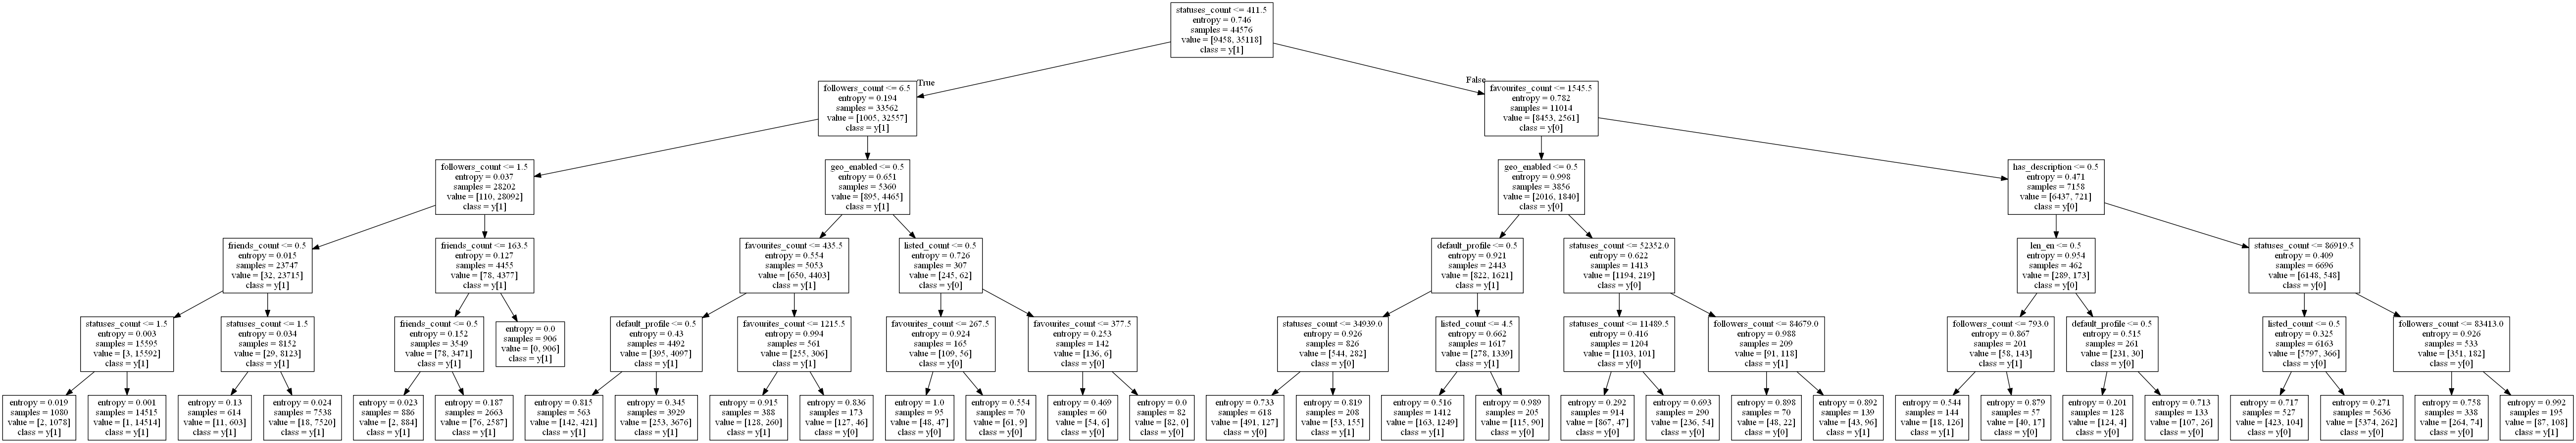

In [20]:
from sklearn import tree
import pydotplus
from IPython.display import Image

best = grid_tree.best_estimator_
dot_data = tree.export_graphviz(best, out_file=None, feature_names=labels, class_names=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

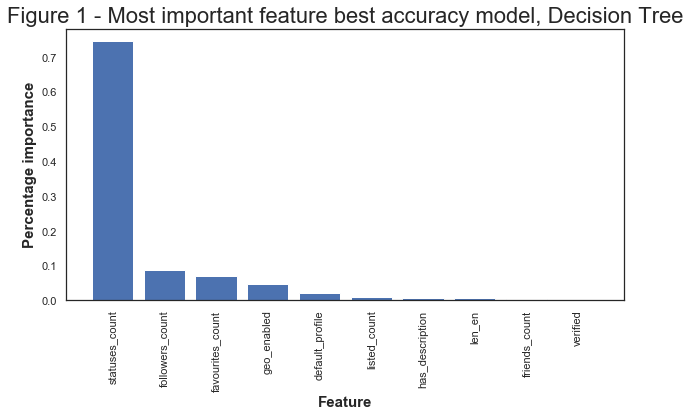

In [21]:
importances = best.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [labels[i] for i in indices]

# Plot
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("white")
plt.figure()
plt.title('Figure 1 - Most important feature best accuracy model, Decision Tree', fontsize=22)
plt.ylabel('Percentage importance', fontsize=15, fontweight='bold')
plt.xlabel('Feature', fontsize=15, fontweight='bold')
plt.bar(range(train_features.shape[1]),importances[indices])
plt.xticks(range(train_features.shape[1]), names, rotation=90)
plt.show()

[[2132  242]
 [ 213 8558]]


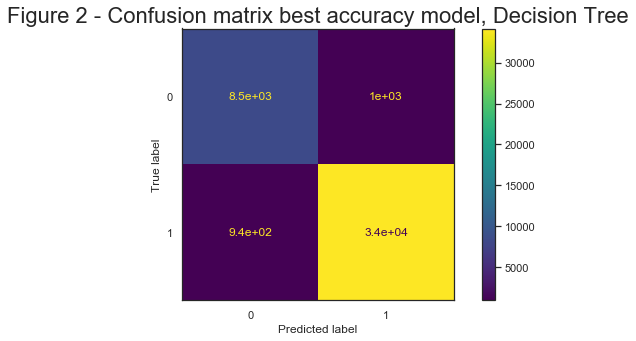

In [22]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_precision_recall_curve, precision_recall_curve

#Predict the values of the train
test_pred=best.predict(test_features)

#Plot the confusion matrix
plot_confusion_matrix(best,train_features,train_target)
plt.title('Figure 2 - Confusion matrix best accuracy model, Decision Tree', fontsize=22)
print(metrics.confusion_matrix(test_target, test_pred))

In [23]:
#Get the metrics for the Decision Tree model
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(metrics.accuracy_score(test_target, test_pred),
                                                                           metrics.precision_score(test_target, test_pred),
                                                                           metrics.recall_score(test_target, test_pred),
                                                                           metrics.f1_score(test_target, test_pred)
                                                                          ))

Accuracy:	0.9591745177209511
Precision:	0.9725
Recall:		0.9757154258351385
F1 Score:	0.9741050594729953



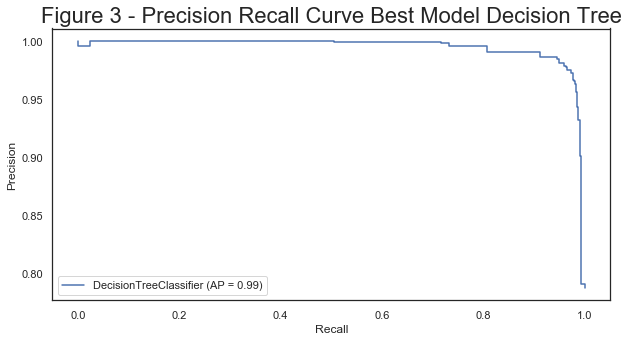

In [24]:
#Plot Precision Recall curve best model decision tree
plot_precision_recall_curve(best,test_features,test_target)
plt.title('Figure 3 - Precision Recall Curve Best Model Decision Tree', fontsize=22)
plt.show()

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=seed)

params2 = {'criterion':['entropy', 'gini'], 'max_depth':[1,3,5], 'min_samples_split':[2,5,10], 'n_estimators':[100,1000,5000]}

grid_rf = GridSearchCV(estimator=rf, param_grid=params2,
                   cv=k, return_train_score=True,
                   scoring = ['accuracy', 'precision', 'recall'],
                   refit='accuracy')

grid_rf.fit(train_features, train_target)
cv_results_rf = pd.DataFrame(grid_rf.cv_results_)

In [200]:
results_rf = cv_results_rf.sort_values(by='rank_test_accuracy', ascending=True)
results_rf = results_rf[['param_criterion','param_max_depth', 
                                'param_min_samples_split', 'param_n_estimators', 
                                'mean_test_accuracy', 'rank_test_accuracy',
                                'mean_test_precision', 'mean_test_recall']]
results_rf.head()

,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_accuracy,rank_test_accuracy,mean_test_precision,mean_test_recall
45,gini,5,2,100,0.950646,1,0.969677,0.967623
48,gini,5,5,100,0.950601,2,0.969540,0.967709
47,gini,5,2,5000,0.950421,3,0.969804,0.967196
53,gini,5,10,5000,0.950377,4,0.969803,0.967139
50,gini,5,5,5000,0.950354,5,0.969775,0.967139


In [26]:
bestrf = grid_rf.best_estimator_
bestrf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

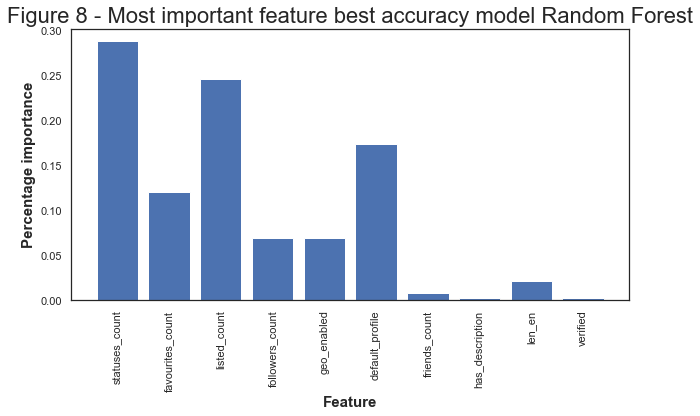

In [27]:
importances_rf = bestrf.feature_importances_

# Sort in descending order
indices_rf = np.argsort(importances_rf)[::-1]

# Sort the labels in a corresponding fashion
names_rf = [labels[i] for i in indices_rf]

# Plot
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("white")
plt.figure()
plt.title('Figure 8 - Most important feature best accuracy model Random Forest', fontsize=22)
plt.ylabel('Percentage importance', fontsize=15, fontweight='bold')
plt.xlabel('Feature', fontsize=15, fontweight='bold')
plt.bar(range(train_features.shape[1]),importances_rf[indices])
plt.xticks(range(train_features.shape[1]), names_rf, rotation=90)
plt.show()

[[2185  189]
 [ 258 8513]]


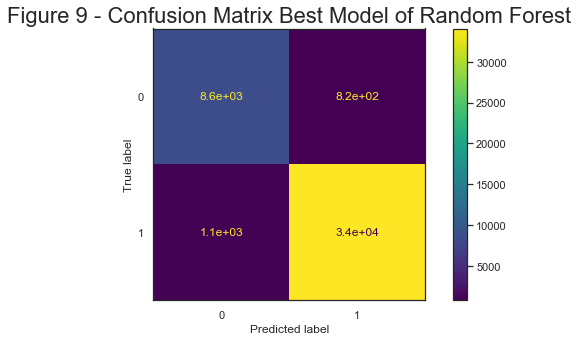

In [28]:
test_pred_rf = bestrf.predict(test_features)
plot_confusion_matrix(bestrf,train_features,train_target)
plt.title('Figure 9 - Confusion Matrix Best Model of Random Forest', fontsize=22)
print(metrics.confusion_matrix(test_target, test_pred_rf))

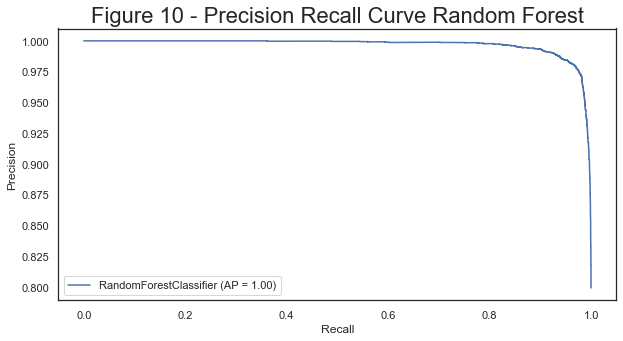

In [29]:
#Complete preicision recall curve for random forst
plot_precision_recall_curve(bestrf,test_features,test_target)
plt.title('Figure 10 - Precision Recall Curve Random Forest', fontsize=22)
plt.show()